In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [17]:
r_range = np.linspace(0, 10, 101)
t_range = np.linspace(0, 100, 101)

rasa = ctrl.Antecedent(r_range, 'rasa')
layanan = ctrl.Antecedent(r_range, 'layanan')
tip = ctrl.Consequent(t_range, 'tip')

#membership function
rasa['buruk']  = fuzz.trimf(rasa.universe, [0, 0, 5])
rasa['sedang'] = fuzz.trimf(rasa.universe, [0, 5, 10])
rasa['enak']   = fuzz.trimf(rasa.universe, [5, 10, 10])

layanan['buruk']  = fuzz.trimf(layanan.universe, [0, 0, 5])
layanan['sedang'] = fuzz.trimf(layanan.universe, [0, 5, 10])
layanan['bagus']  = fuzz.trimf(layanan.universe, [5, 10, 10])

tip['sedikit'] = fuzz.trimf(tip.universe, [0, 0, 50])
tip['sedang']  = fuzz.trimf(tip.universe, [25, 50, 75])
tip['banyak']  = fuzz.trimf(tip.universe, [50, 100, 100])

In [18]:
# Rules
rule1 = ctrl.Rule(rasa['buruk']  & layanan['buruk'],  tip['sedikit'])
rule2 = ctrl.Rule(rasa['buruk']  & layanan['sedang'],  tip['sedikit'])
rule3 = ctrl.Rule(rasa['buruk']  & layanan['bagus'],   tip['sedang'])
rule4 = ctrl.Rule(rasa['sedang'] & layanan['buruk'],  tip['sedikit'])
rule5 = ctrl.Rule(rasa['sedang'] & layanan['sedang'], tip['sedang'])
rule6 = ctrl.Rule(rasa['sedang'] & layanan['bagus'],  tip['banyak'])
rule7 = ctrl.Rule(rasa['enak']   & layanan['buruk'],  tip['sedang'])
rule8 = ctrl.Rule(rasa['enak']   & layanan['sedang'], tip['banyak'])
rule9 = ctrl.Rule(rasa['enak']   & layanan['bagus'],  tip['banyak'])

# Control System dan simulasi
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [29]:
df = pd.read_csv("dataset_kualitas_pelayanan.csv")

tips = []
for _, row in df.iterrows():
    tipping.input['rasa'] = row['rasa']
    tipping.input['layanan'] = row['layanan']
    tipping.compute()
    tips.append(round(tipping.output['tip'], 2))

df['tip'] = tips

csv_path = "dataset_kualitas_pelayanan_setelah_fuzzy.csv"
df.to_csv(csv_path, index=False)

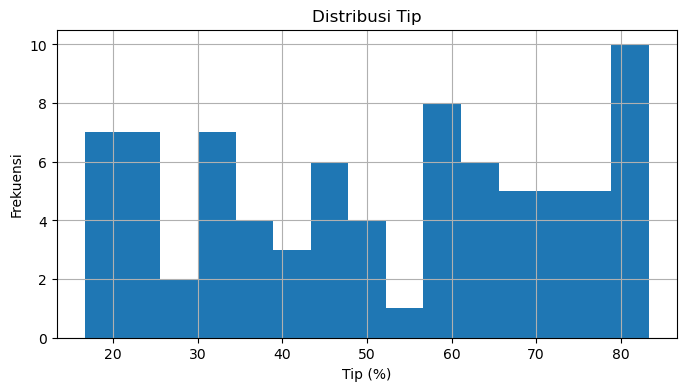

In [30]:
plt.figure(figsize=(8,4))
plt.hist(df['tip'], bins=15)
plt.title('Distribusi Tip')
plt.xlabel('Tip (%)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

In [3]:
!pip install pipreqs

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/798.3 kB ? eta -:--:--
   ------------- -------------------------- 262.1/798.3 kB ? eta -:--:--
   -------------------------- ------------- 524.3/798.3 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 798.3/798.3 kB 1.8 MB/s  0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13856 sha256=dab6d46753ed1a90f46d9f89854ec2d569639276673396311e64162edb9b284c
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\1a\bf\a1\4cee4f7678c68c5875ca89eaccf460593539805c3906722228
Successfully built docopt

  Attempting uninstall: ipython

    Found existing installation: ipython 9.1.0

    Uninstalling ipython-9.1.0:

      Successfully uninstalled ipython-9.1.0

   -------------------------- ------------- 4/6 [ipython]
   -------------------------- ------------- 4/6 [ipython]
   ---------

  DEPRECATION: Building 'docopt' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'docopt'. Discussion can be found at https://github.com/pypa/pip/issues/6334
